In [38]:
import math
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import pprint

In [39]:
# load all data sources, all sliced by counties
covid_df = pd.read_csv('data/covid-2021-us-counties.csv', index_col=False)
population_df = pd.read_csv('data/2020CensusTotalPopulation.csv', index_col=False, skiprows = 1)
obesity_df = pd.read_csv('data/ObesityData.csv', index_col=False, skiprows = 2)
pi_df = pd.read_csv('data/Physical_Inactivity_Data.csv', index_col=False, skiprows = 2) # physical inactivity
diabetes_df = pd.read_csv('data/DiabetesAtlasData.csv', index_col=False, skiprows = 2)
hospitalization_df = pd.read_csv('data/hospitalizations-2021-02-28.csv', index_col=False, skiprows = 0) # hospitalizations
vaccinations_df = pd.read_csv('data/vaccinations-2021-02-28.csv', index_col=False, skiprows = 0) # vaccinations


In [40]:
print(hospitalization_df)

          date location_key  new_hospitalized_patients  \
0   2021-02-28        US_AK                        3.0   
1   2021-02-28        US_AL                       83.0   
2   2021-02-28        US_AR                       31.0   
3   2021-02-28        US_AS                        0.0   
4   2021-02-28        US_AZ                      112.0   
..         ...          ...                        ...   
58  2021-02-28        US_VT                        4.0   
59  2021-02-28        US_WA                       26.0   
60  2021-02-28        US_WI                       53.0   
61  2021-02-28        US_WV                       20.0   
62  2021-02-28        US_WY                        0.0   

    cumulative_hospitalized_patients  current_hospitalized_patients  \
0                             1286.0                           20.0   
1                            45834.0                          721.0   
2                            22871.0                          432.0   
3                  

In [41]:
# util function
def isfloat(num):
    if not num:
        return False

    try:
        float(num)
        return True
    except ValueError:
        return False

In [42]:
# extract 2021-02-28 data for covid cases and deaths

# new a dictionary, key is state, values will be 
#  - covid cases, deaths, hospitalization, vaccination, population, pi, obesity, diabetes
#  - cases pct, deaths pct, pi pct, obesity pct, diaebets pct, hospitalization pct, vaccinations pct
# ccdata = {}

# print("covid size: ", date_df['state'].size)
# for index, row in date_df.iterrows():
#     state = row['state']
#     v = {}
#     ccdata[state] = v
#     v['state'] = state
#     v['cases'] = row['cases']
#     v['hospitalization'] = row['cumulative_hospitalized_patients']
#     v['vaccinations'] = row['vaccinations']
#     if math.isnan(row['deaths']):
#         v['deaths'] = 0 
#     else:
#         v['deaths'] = row['deaths']
    
# print(ccdata[1001])
# print(len(ccdata))

In [43]:
# pseudo programming 
date_df = covid_df[(covid_df['date'] == "2021-02-28")]
#date_df2 = hospitalization_df[(hospitalization_df['date'] == "2021-02-28")]
#print(date_df2.head(20))

In [44]:
print(population_df.head(-10))

      Estimate!!Total Margin of Error!!Total              id  \
0               55639                  *****  0500000US01001   
1              218289                  *****  0500000US01003   
2               25026                  *****  0500000US01005   
3               22374                  *****  0500000US01007   
4               57755                  *****  0500000US01009   
...               ...                    ...             ...   
3207           326953                  *****  0500000US72127   
3208            36586                  *****  0500000US72129   
3209            36292                  *****  0500000US72131   
3210            21474                  *****  0500000US72133   
3211            72450                  *****  0500000US72135   

                      Geographic Area Name  
0                  Autauga County, Alabama  
1                  Baldwin County, Alabama  
2                  Barbour County, Alabama  
3                     Bibb County, Alabama  
4     

In [45]:
# merge population data into ccdata
ccdata_state = {}
pop_fips = {}
for index, row in population_df.iterrows(): 
    state_str = row['Geographic Area Name']
    if not ',' in state_str:
        continue
    state_str = state_str[state_str.rindex(',') + 2:]
    #print(state_str)
    #if state_str != 'Alabama':
     #   break
    
    v = ccdata_state.get(state_str)
    if not v:
        v = {}
        ccdata_state[state_str] = v
        v['population'] = 0
    p = row["Estimate!!Total"]
    #print(p)
    v['population'] += p
    #print(p, v)
    fips_str = row['id']
    fips_str = fips_str[-5:]
    if not isfloat(fips_str):
        print("fips: ", fips_str)
        continue
    fips = int(fips_str)
    pop_fips[fips] = p

#pprint.pprint(pop_fips)
pprint.pprint(ccdata_state)
p = 0
for k, v in ccdata_state.items():
    p += v['population']
    print(p)

{'Alabama': {'population': 4893186},
 'Alaska': {'population': 736990},
 'Arizona': {'population': 7174064},
 'Arkansas': {'population': 3011873},
 'California': {'population': 39346023},
 'Colorado': {'population': 5684926},
 'Connecticut': {'population': 3570549},
 'Delaware': {'population': 967679},
 'District of Columbia': {'population': 701974},
 'Florida': {'population': 21216924},
 'Georgia': {'population': 10516579},
 'Hawaii': {'population': 1420074},
 'Idaho': {'population': 1754367},
 'Illinois': {'population': 12716164},
 'Indiana': {'population': 6696893},
 'Iowa': {'population': 3150011},
 'Kansas': {'population': 2912619},
 'Kentucky': {'population': 4461952},
 'Louisiana': {'population': 4664616},
 'Maine': {'population': 1340825},
 'Maryland': {'population': 6037624},
 'Massachusetts': {'population': 6873003},
 'Michigan': {'population': 9973907},
 'Minnesota': {'population': 5600166},
 'Mississippi': {'population': 2981835},
 'Missouri': {'population': 6124160},
 'Mon

In [46]:
pprint.pprint(pop_fips)

{1001: 55639,
 1003: 218289,
 1005: 25026,
 1007: 22374,
 1009: 57755,
 1011: 10173,
 1013: 19726,
 1015: 114324,
 1017: 33427,
 1019: 26035,
 1021: 44147,
 1023: 12755,
 1025: 23866,
 1027: 13285,
 1029: 14952,
 1031: 52238,
 1033: 54957,
 1035: 12219,
 1037: 10696,
 1039: 37096,
 1041: 13826,
 1043: 83345,
 1045: 49293,
 1047: 38184,
 1049: 71430,
 1051: 81526,
 1053: 36775,
 1055: 102721,
 1057: 16406,
 1059: 31587,
 1061: 26383,
 1063: 8221,
 1065: 14754,
 1067: 17123,
 1069: 105319,
 1071: 51765,
 1073: 658615,
 1075: 13854,
 1077: 92870,
 1079: 32969,
 1081: 163461,
 1083: 96921,
 1085: 9936,
 1087: 18437,
 1089: 367686,
 1091: 19138,
 1093: 29818,
 1095: 96137,
 1097: 413977,
 1099: 21006,
 1101: 226451,
 1103: 119352,
 1105: 9104,
 1107: 20049,
 1109: 33274,
 1111: 22732,
 1113: 57938,
 1115: 88929,
 1117: 216350,
 1119: 12595,
 1121: 80244,
 1123: 40450,
 1125: 208854,
 1127: 63802,
 1129: 16336,
 1131: 10552,
 1133: 23712,
 2013: 3389,
 2016: 5708,
 2020: 292090,
 2050: 18263

In [47]:
# global dict 
# key: state
# value: a dict, 
#  keys are: population, 
#           obesity_cases, diabete_cases, hospitalization, vaccination, and their percentage value
# ccdata_state = {}

# loop through obesity data, add a colume for abs value of obesity based on percentage
for index, row in obesity_df.iterrows():
    fips = row['County_FIPS']
    
    # get population
    p = pop_fips.get(fips, 0)
    
    pct = row['Obesity Percentage']
    ob = (pct/100) * p
    obesity_df.at[index, "Obesity"] = ob
    if row['State'] == 'Alaska':
        print(pct, p, ob, sep=',') 
        




24.2,3389,820.1379999999999
29.1,5708,1661.0280000000002
28.7,292090,83829.82999999999
30.2,18263,5515.4259999999995
21.3,739,157.40699999999998
18.9,2502,472.87799999999993
24.7,4934,1218.698
30.1,98455,29634.954999999998
20.3,2547,517.041
19.4,2135,414.18999999999994
24.0,32099,7703.759999999999
31.8,58809,18701.262
37.2,13833,5145.876000000001
25.5,13383,3412.665
22.0,8298,1825.56
24.6,1156,284.37600000000003
32.6,107360,34999.36
31.6,10009,3162.844
31.9,9375,2990.625
32.0,7709,2466.88
17.2,3278,563.8159999999999
19.9,6338,1261.262
21.7,8569,1859.473
18.3,1300,237.9
29.9,6911,2066.389
30.6,0,0.0
25.7,2510,645.07
19.8,597,118.206
27.9,5305,1480.0949999999998


In [48]:
# aggregate at State level
for index, row in obesity_df.iterrows():
    state = row['State']
    if 'nan' == str(state):
        # print('state is nan!!!!!!!', type(state))
        # print(row)
        continue
    
    v = ccdata_state.get(state)
    if not v:
        v = {}
        ccdata_state[state] = v
        
    if 'obesity_cases' not in v:
        v['obesity_cases'] = 0
    
    # cases = obesity_df.loc[index, "Obesity"]
    cases = row['Obesity']
    v['obesity_cases'] += cases
    if state == 'Alaska':
        print(cases, v['obesity_cases'], sep='\t\t')
    
# pprint.pprint(ccdata_state)

820.1379999999999		820.1379999999999
1661.0280000000002		2481.166
83829.82999999999		86310.99599999998
5515.4259999999995		91826.42199999999
157.40699999999998		91983.829
472.87799999999993		92456.707
1218.698		93675.405
29634.954999999998		123310.36
517.041		123827.401
414.18999999999994		124241.591
7703.759999999999		131945.351
18701.262		150646.61299999998
5145.876000000001		155792.48899999997
3412.665		159205.15399999998
1825.56		161030.71399999998
284.37600000000003		161315.08999999997
34999.36		196314.44999999995
3162.844		199477.29399999997
2990.625		202467.91899999997
2466.88		204934.79899999997
563.8159999999999		205498.61499999996
1261.262		206759.87699999995
1859.473		208619.34999999995
237.9		208857.24999999994
2066.389		210923.63899999994
0.0		210923.63899999994
645.07		211568.70899999994
118.206		211686.91499999995
1480.0949999999998		213167.00999999995


In [49]:
# covert to percentage

for k, v in ccdata_state.items():
    print(k, v)
    # get population
    p = v['population']
    cases = v.get('obesity_cases', 0)
    v['obesity_state_pct'] = (cases / p) * 100
#pprint.pprint(obesity_df)
pprint.pprint(ccdata_state)

Alabama {'population': 4893186, 'obesity_cases': 1601062.227}
Alaska {'population': 736990, 'obesity_cases': 213167.00999999995}
Arizona {'population': 7174064, 'obesity_cases': 2027707.535}
Arkansas {'population': 3011873, 'obesity_cases': 932215.5009999998}
California {'population': 39346023, 'obesity_cases': 9748383.118999999}
Colorado {'population': 5684926, 'obesity_cases': 1267355.6359999997}
Connecticut {'population': 3570549, 'obesity_cases': 939247.6109999998}
Delaware {'population': 967679, 'obesity_cases': 316691.05}
District of Columbia {'population': 701974, 'obesity_cases': 172685.60400000002}
Florida {'population': 21216924, 'obesity_cases': 5857181.36}
Georgia {'population': 10516579, 'obesity_cases': 2935572.5870000008}
Hawaii {'population': 1420074, 'obesity_cases': 352642.378}
Idaho {'population': 1754367, 'obesity_cases': 480889.562}
Illinois {'population': 12716164, 'obesity_cases': 3484029.9739999995}
Indiana {'population': 6696893, 'obesity_cases': 2107291.516}
I

In [50]:
for index, row in diabetes_df.iterrows():
    
    fips = row['County_FIPS']
    p = pop_fips.get(fips, 0)
    pct = row['Diagnosed Diabetes Percentage']

    diabetes_df.at[index, "Diabetes"] = (pct/100) * p
    #print(pct) 
    #print(p)
    
for index, row in diabetes_df.iterrows():
    state = row['State']
    v = ccdata_state.get(state)
    if 'nan' == str(state):
        # print('state is nan!!!!!!!', type(state))
        # print(row)
        continue
    if not v:
        v = {}
        ccdata_state[state] = v
        
    if 'diabetes_cases' not in v: 
        v['diabetes_cases'] = 0
    cases = row["Diabetes"]
    v['diabetes_cases'] += cases
    
#pprint.pprint(diabetes_df)
# covert to percentage

for k, v in ccdata_state.items():
    print(k, v)
    # get population
    p = v['population']
    cases = v.get('diabetes_cases', 0)
    v['diabetes_state_pct'] = (cases / p) * 100
pprint.pprint(ccdata_state)


Alabama {'population': 4893186, 'obesity_cases': 1601062.227, 'obesity_state_pct': 32.72024049361704, 'diabetes_cases': 550137.301}
Alaska {'population': 736990, 'obesity_cases': 213167.00999999995, 'obesity_state_pct': 28.924003039389945, 'diabetes_cases': 60578.734}
Arizona {'population': 7174064, 'obesity_cases': 2027707.535, 'obesity_state_pct': 28.264419372339024, 'diabetes_cases': 598545.4579999999}
Arkansas {'population': 3011873, 'obesity_cases': 932215.5009999998, 'obesity_state_pct': 30.95135488780569, 'diabetes_cases': 304599.611}
California {'population': 39346023, 'obesity_cases': 9748383.118999999, 'obesity_state_pct': 24.7760316690711, 'diabetes_cases': 3384940.2040000004}
Colorado {'population': 5684926, 'obesity_cases': 1267355.6359999997, 'obesity_state_pct': 22.293265312512418, 'diabetes_cases': 373621.2679999999}
Connecticut {'population': 3570549, 'obesity_cases': 939247.6109999998, 'obesity_state_pct': 26.30541160477002, 'diabetes_cases': 279383.79500000004}
Delaw

In [51]:
for index, row in pi_df.iterrows():
    
    fips = row['County_FIPS']
    p = pop_fips.get(fips, 0) 
    pct = row['Physical Inactivity Percentage']

    pi_df.at[index, "Physical_Inactivity"] = (pct/100) * p
    #print(pct) 
    #print(p)
    
for index, row in pi_df.iterrows():
    state = row['State']
    v = ccdata_state.get(state)
    if 'nan' == str(state):
        # print('state is nan!!!!!!!', type(state))
        # print(row)
        continue
    if not v:
        v = {}
        ccdata_state[state] = v
        
    if 'Physical_Inactivity_cases' not in v:
        v['Physical_Inactivity_cases'] = 0
        
    cases = row["Physical_Inactivity"]
    v['Physical_Inactivity_cases'] += cases
    
#pprint.pprint(pi_df)
# covert to percentage

for k, v in ccdata_state.items():
    if k == 'Unknown':
        continue
    print(k, v)
    # get population
    p = v['population']
    cases = v.get('Physical_Inactivity_cases', 0)
    v['pi_state_pct'] = (cases / p) * 100

pprint.pprint(ccdata_state)

Alabama {'population': 4893186, 'obesity_cases': 1601062.227, 'obesity_state_pct': 32.72024049361704, 'diabetes_cases': 550137.301, 'diabetes_state_pct': 11.242926408274691, 'Physical_Inactivity_cases': 1273124.5829999999}
Alaska {'population': 736990, 'obesity_cases': 213167.00999999995, 'obesity_state_pct': 28.924003039389945, 'diabetes_cases': 60578.734, 'diabetes_state_pct': 8.219749793077247, 'Physical_Inactivity_cases': 133165.611}
Arizona {'population': 7174064, 'obesity_cases': 2027707.535, 'obesity_state_pct': 28.264419372339024, 'diabetes_cases': 598545.4579999999, 'diabetes_state_pct': 8.343185368850904, 'Physical_Inactivity_cases': 1442820.2079999999}
Arkansas {'population': 3011873, 'obesity_cases': 932215.5009999998, 'obesity_state_pct': 30.95135488780569, 'diabetes_cases': 304599.611, 'diabetes_state_pct': 10.113295314908695, 'Physical_Inactivity_cases': 773338.102}
California {'population': 39346023, 'obesity_cases': 9748383.118999999, 'obesity_state_pct': 24.7760316690

In [52]:
state_abbreviations = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia',
    'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa',
    'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri',
    'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey',
    'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio',
    'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont',
    'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'
}

# for loop the state, get rows with date = 2021-02-28, and location_key == state
df = vaccinations_df
for st in state_abbreviations.keys():
    print(st, state_abbreviations[st])
    us_st = 'US_' + st
    filtered_rows = df[(df["date"] == '2021-02-28') & (df["location_key"] == us_st)]
    cumulative_persons_vaccinated = filtered_rows.iloc[0]["cumulative_persons_vaccinated"]
    print(cumulative_persons_vaccinated)
    # get population of the state
    p = ccdata_state[state_abbreviations[st]]["population"]
    # calc percentage
    pct = (cumulative_persons_vaccinated / p) * 100    
    # add to the ccdata_state, vola.
    ccdata_state[state_abbreviations[st]]["vaccinations"] = cumulative_persons_vaccinated
    ccdata_state[state_abbreviations[st]]["vaccinations_pct"] = pct

pprint.pprint(ccdata_state)

    


AL Alabama
649745
AK Alaska
166735
AZ Arizona
1220706
AR Arkansas
419502
CA California
6141765
CO Colorado
901484
CT Connecticut
690663
DE Delaware
144139
FL Florida
3163425
GA Georgia
1259837
HI Hawaii
248020
ID Idaho
256810
IL Illinois
2004662
IN Indiana
1004776
IA Iowa
534690
KS Kansas
430237
KY Kentucky
696591
LA Louisiana
664121
ME Maine
227707
MD Maryland
884208
MA Massachusetts
1220455
MI Michigan
1491316
MN Minnesota
941537
MS Mississippi
413930
MO Missouri
807368
MT Montana
188782
NE Nebraska
309977
NV Nevada
447761
NH New Hampshire
233437
NJ New Jersey
1423424
NM New Mexico
467493
NY New York
2691322
NC North Carolina
1574172
ND North Dakota
147054
OH Ohio
1686825
OK Oklahoma
688342
OR Oregon
632080
PA Pennsylvania
1911844
RI Rhode Island
183254
SC South Carolina
737658
SD South Dakota
184028
TN Tennessee
878954
TX Texas
3533100
UT Utah
391851
VT Vermont
104583
VA Virginia
1349077
WA Washington
1134837
WV West Virginia
317008
WI Wisconsin
958333
WY Wyoming
99849
{'Alabama': {

In [53]:
for index, row in vaccinations_df.iterrows():
    state = state_abbreviations.get(row['location_key'], 'Unknown')
    v = ccdata_state.get(state)
    if 'nan' == str(state):
        # print('state is nan!!!!!!!', type(state))
        # print(row)
        continue
    if not v:
        v = {}
        ccdata_state[state] = v
        
    if 'vaccinations' not in v:
        v['vaccinations'] = 0
        
    v['vaccinations'] += cases

In [54]:
df = hospitalization_df
for st in state_abbreviations.keys():
    print(st, state_abbreviations[st])
    us_st = 'US_' + st
    print(us_st)
    filtered_rows = df[(df["date"] == '2021-02-28') & (df["location_key"] == us_st)]
    # print(filtered_rows)
    cumulative_hospitalized_patients = filtered_rows.iloc[0]["cumulative_hospitalized_patients"]
    print(cumulative_hospitalized_patients)
    # get population of the state
    p = ccdata_state[state_abbreviations[st]]["population"]

    # calc percentage
    pct = (cumulative_hospitalized_patients / p) * 100    
   
    # add to the ccdata_state, vola.
    ccdata_state[state_abbreviations[st]]["hospitalizations"] = cumulative_hospitalized_patients
    ccdata_state[state_abbreviations[st]]["hospitalizations_pct"] = pct

pprint.pprint(ccdata_state)

AL Alabama
US_AL
45834.0
AK Alaska
US_AK
1286.0
AZ Arizona
US_AZ
54896.0
AR Arkansas
US_AR
22871.0
CA California
US_CA
215334.0
CO Colorado
US_CO
23904.0
CT Connecticut
US_CT
15689.0
DE Delaware
US_DE
5227.0
FL Florida
US_FL
141728.0
GA Georgia
US_GA
91363.0
HI Hawaii
US_HI
3443.0
ID Idaho
US_ID
7254.0
IL Illinois
US_IL
64939.0
IN Indiana
US_IN
44082.0
IA Iowa
US_IA
18031.0
KS Kansas
US_KS
19968.0
KY Kentucky
US_KY
64500.0
LA Louisiana
US_LA
33607.0
ME Maine
US_ME
1801.0
MD Maryland
US_MD
27841.0
MA Massachusetts
US_MA
25944.0
MI Michigan
US_MI
44168.0
MN Minnesota
US_MN
19603.0
MS Mississippi
US_MS
22562.0
MO Missouri
US_MO
40137.0
MT Montana
US_MT
8837.0
NE Nebraska
US_NE
9985.0
NV Nevada
US_NV
21089.0
NH New Hampshire
US_NH
3746.0
NJ New Jersey
US_NJ
45273.0
NM New Mexico
US_NM
13706.0
NY New York
US_NY
100414.0
NC North Carolina
US_NC
49110.0
ND North Dakota
US_ND
4957.0
OH Ohio
US_OH
72078.0
OK Oklahoma
US_OK
45839.0
OR Oregon
US_OR
7400.0
PA Pennsylvania
US_PA
68226.0
RI Rhode Is

In [55]:
ccdatalist = []
keys = list(ccdata_state.keys())

for k in keys:
    if k == 'Puerto Rico' or k == 'District of Columbia' or k == 'Unknown':
        continue
    print(k)
    v = ccdata_state.get(k)
    
    # make a list from the map
    row = []
    #row.append(v['cases'])
    row.append(v['population'])
    row.append(v['hospitalizations_pct'])
    #row.append(v['deaths'])
    row.append(v['vaccinations_pct'])
    #row.append(v['cases_pct'])
    #row.append(v['deaths_pct'])
    row.append(v['obesity_state_pct']) 
    row.append(v['diabetes_state_pct'])
    row.append(v['pi_state_pct'])
    

    ccdatalist.append(row)
pprint.pprint(ccdatalist)
ccdf = pd.DataFrame(ccdatalist, columns = ['Population', 
'Hospitalization Percentage', 'Vaccination Percentage', 'Obesity Percentage', 'Diabetes Percentage', 'Physical Inactivity Percentage'])
print(ccdf)

Alabama
Alaska
Arizona
Arkansas
California
Colorado
Connecticut
Delaware
Florida
Georgia
Hawaii
Idaho
Illinois
Indiana
Iowa
Kansas
Kentucky
Louisiana
Maine
Maryland
Massachusetts
Michigan
Minnesota
Mississippi
Missouri
Montana
Nebraska
Nevada
New Hampshire
New Jersey
New Mexico
New York
North Carolina
North Dakota
Ohio
Oklahoma
Oregon
Pennsylvania
Rhode Island
South Carolina
South Dakota
Tennessee
Texas
Utah
Vermont
Virginia
Washington
West Virginia
Wisconsin
Wyoming
[[4893186,
  0.9366903281420326,
  13.278567379208555,
  32.72024049361704,
  11.242926408274691,
  26.01831573539203],
 [736990,
  0.17449354808070666,
  22.62378051262568,
  28.924003039389945,
  8.219749793077247,
  18.068849102430157],
 [7174064,
  0.7652008680156742,
  17.0155437698911,
  28.264419372339024,
  8.343185368850904,
  20.11161606587284],
 [3011873,
  0.7593613674945789,
  13.928276524275757,
  30.95135488780569,
  10.113295314908695,
  25.6763184237848],
 [39346023,
  0.5472827584124575,
  15.609620824956

In [62]:
correlation_matrix_pearson = ccdf.corr(method ='pearson')

In [63]:
correlation_matrix_kendall = ccdf.corr(method ='kendall')

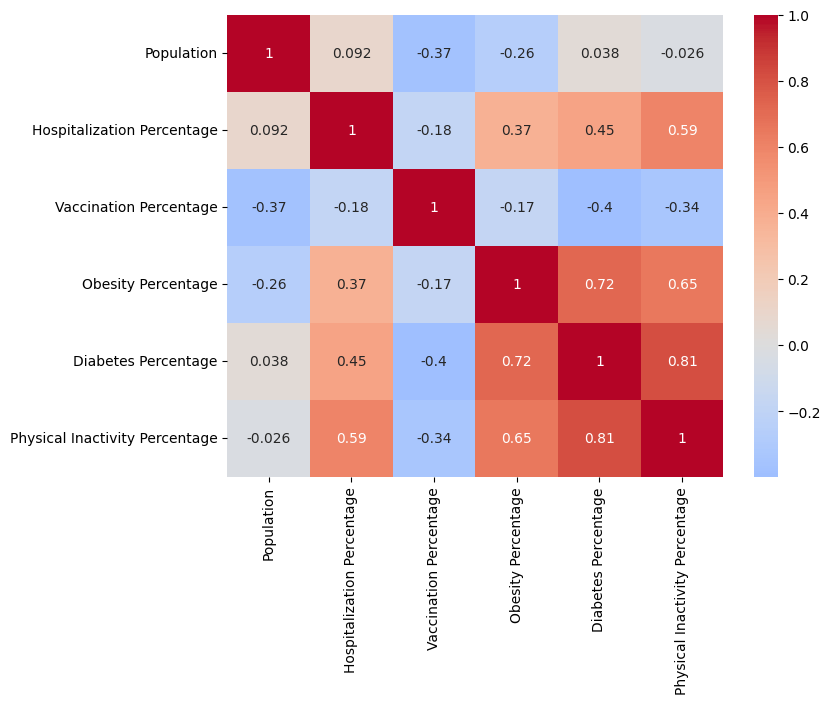

In [64]:
# Set up the figure and axes
plt.figure(figsize=(8, 6))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix_pearson, annot=True, cmap="coolwarm", center=0)

# Show the plot
plt.show()


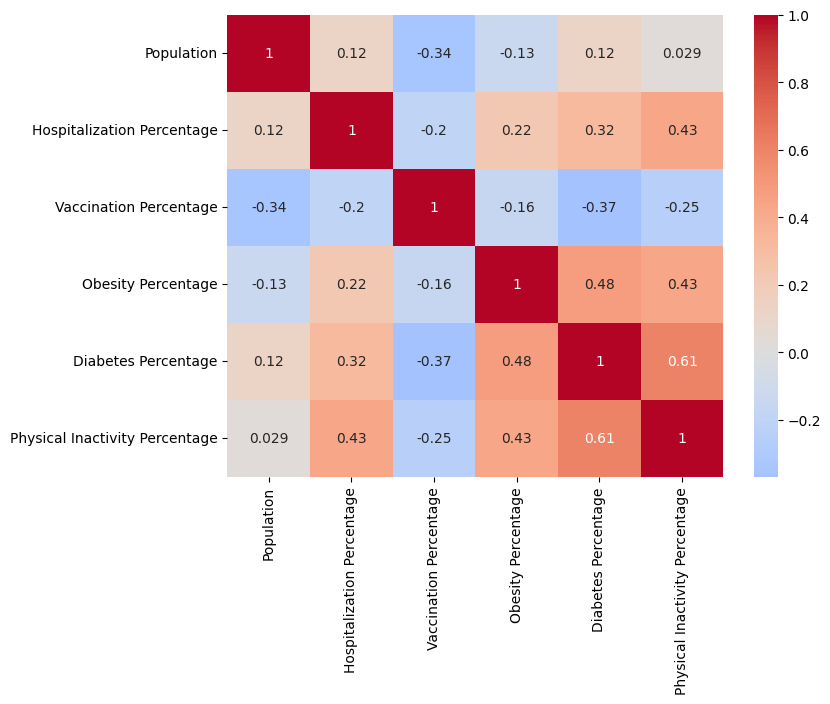

In [65]:
# Set up the figure and axes
plt.figure(figsize=(8, 6))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix_kendall, annot=True, cmap="coolwarm", center=0)

# Show the plot
plt.show()


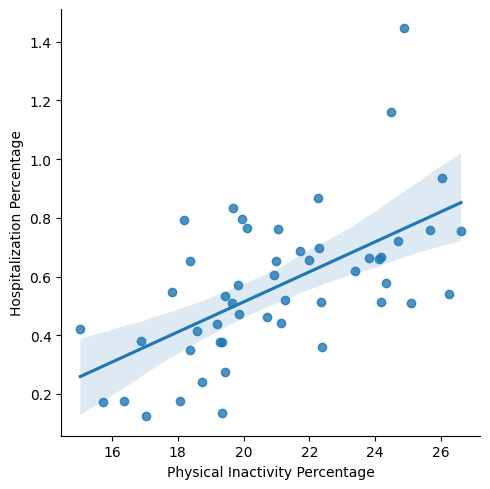

In [68]:

sns.lmplot(x='Physical Inactivity Percentage', y='Hospitalization Percentage', data=ccdf)
plt.show()

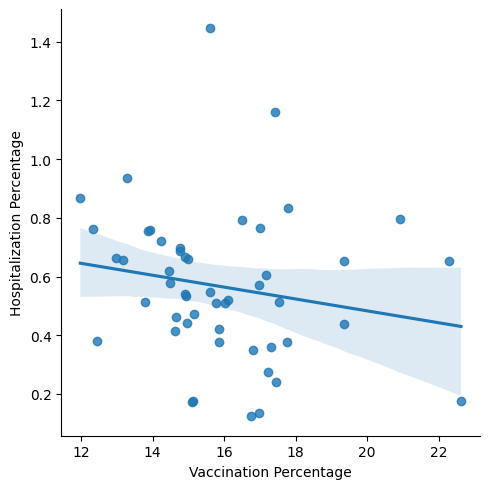

In [69]:
sns.lmplot(x='Vaccination Percentage', y='Hospitalization Percentage', data=ccdf)
plt.show()

In [40]:
# raw data size
print("processed data # of rows: ", ccdf['County FIPS'].size)

processed data # of rows:  3131


In [41]:
# keep counties with population greater than 50K only   7yyyyyyyy7
df_sub = ccdf[(ccdf['County Population'] >= 50000)]

###### whole country - Physical Inactivity correlation
print("# of counties: ", df_sub['County FIPS'].size)

r, p = stats.pearsonr(df_sub['Covid Case Percentage'], df_sub['Physical Inactivity Percentage'])
print("covid case - pi correlation:", r, "p-value:", p)
r, p = stats.pearsonr(df_sub['Covid Death Percentage'], df_sub['Physical Inactivity Percentage'])
print("covid death - pi correlation:", r, "p-value:", p)

# of counties:  985
covid case - pi correlation: 0.30083175293684705 p-value: 4.726008887156151e-22
covid death - pi correlation: 0.4060170420839583 p-value: 2.198308964206128e-40


In [42]:
###### whole country - Obesity correlation
print("# of counties: ", df_sub['County FIPS'].size)

r, p = stats.pearsonr(df_sub['Covid Case Percentage'], df_sub['Obesity Percentage'])
print("covid case - obesity correlation:", r, "p-value:", p)
r, p = stats.pearsonr(df_sub['Covid Death Percentage'], df_sub['Obesity Percentage'])
print("covid death - obesity correlation:", r, "p-value:", p)

# of counties:  985
covid case - obesity correlation: 0.1726919522412191 p-value: 4.924064175306927e-08
covid death - obesity correlation: 0.2023788834323017 p-value: 1.4554021251953065e-10


In [43]:
###### whole country - Diabetes correlation
print("# of counties: ", df_sub['County FIPS'].size)

r, p = stats.pearsonr(df_sub['Covid Case Percentage'], df_sub['Diabetes Percentage'])
print("covid case correlation:", r, "p-value:", p)
r, p = stats.pearsonr(df_sub['Covid Death Percentage'], df_sub['Diabetes Percentage'])
print("covid death correlation:", r, "p-value:", p)

# of counties:  985
covid case correlation: 0.22372951996649532 p-value: 1.2208070327342218e-12
covid death correlation: 0.29895167831596625 p-value: 8.742715933432988e-22
